In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
passengers = pd.read_csv('titanic.csv')
print(passengers.columns)
passengers.describe()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Part 1

### 1. Total passenger count

There are 1310 rows, but the last one is completely null, so we have data on only 1309 passengers.

In [3]:
print(passengers.shape[0])
passengers.tail()

1310


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
passengers.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

### 2. Passengers by sex

In [5]:
passengers.sex.replace(np.NaN, 'unknown', inplace=True)
passengers.groupby(['sex']).size().reset_index(name='total_passengers')

,sex,total_passengers
0,female,466
1,male,843
2,unknown,1


### 3. Passengers by age decade

In [6]:
print(passengers['age'].max()) # only need to handle decades up to this age
passengers['age_group'] = 'unknown'
passengers.loc[passengers['age'] <= 10, 'age_group'] = '0-10 years'
passengers.loc[(passengers['age'] > 10) & (passengers['age'] <= 20), 'age_group'] = '11-20 years'
passengers.loc[(passengers['age'] > 20) & (passengers['age'] <= 30), 'age_group'] = '21 - 30 years'
passengers.loc[(passengers['age'] > 30) & (passengers['age'] <= 40), 'age_group'] = '31 - 40 years'
passengers.loc[(passengers['age'] > 40) & (passengers['age'] <= 50), 'age_group'] = '41 - 50 years'
passengers.loc[(passengers['age'] > 50) & (passengers['age'] <= 60), 'age_group'] = '51 - 60 years'
passengers.loc[(passengers['age'] > 60) & (passengers['age'] <= 70), 'age_group'] = '61 - 70 years'
passengers.loc[(passengers['age'] > 70) & (passengers['age'] <= 80), 'age_group'] = '71 - 80 years'
passengers.groupby(['age_group']).size().reset_index(name='total_passengers')

80.0


,age_group,total_passengers
0,0-10 years,86
1,11-20 years,162
2,21 - 30 years,361
3,31 - 40 years,210
4,41 - 50 years,132
5,51 - 60 years,62
6,61 - 70 years,27
7,71 - 80 years,6
8,unknown,264


### 4. How many passengers survived without boarding a lifeboat?

In [7]:
survivors = passengers.where(passengers['survived'] == 1.0)
survivors['name'].count() - survivors['boat'].count()

23

## Part 2

In this exercise, you will be breaking the dataset into groups,
and computing the *survival rate* for each group:
	survival rate = (number of survivors) / (number of passengers)
Present your computation in each case as a bar chart.

In [8]:
def survival_rate(df, breakouts, title):
    survival_rates = np.round(df.pivot_table('survived', index=breakouts, aggfunc='mean'), 2)
    survival_rates.plot(kind='bar', title=title, figsize=(7, 5), legend=False, fontsize=12)
    return survival_rates

### 4. Survival rate by gender

,survived
sex,
female,0.73
male,0.19
unknown,NaN


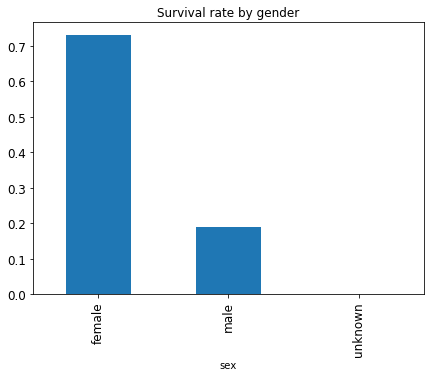

In [9]:
survival_rate(passengers, ['sex'], 'Survival rate by gender')

### 5. Survival rate by age decade

,survived
age_group,
0-10 years,0.58
11-20 years,0.40
21 - 30 years,0.37
31 - 40 years,0.42
41 - 50 years,0.39
51 - 60 years,0.48
61 - 70 years,0.22
71 - 80 years,0.33
unknown,0.28


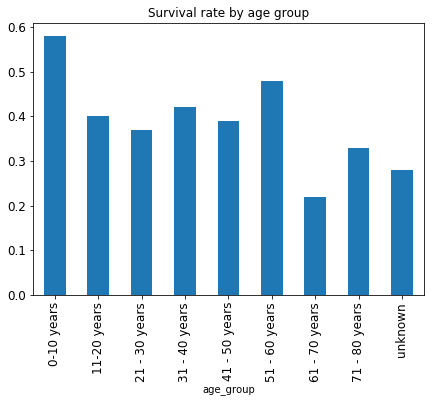

In [10]:
survival_rate(passengers, ['age_group'], 'Survival rate by age group')

### 6. Cross product of age group and gender

survived
sex     age_group              
female  0-10 years         0.61
        11-20 years        0.74
        21 - 30 years      0.72
        31 - 40 years      0.81
        41 - 50 years      0.78
        51 - 60 years      0.92
        61 - 70 years      0.83
        71 - 80 years      1.00
        unknown            0.60
male    0-10 years         0.56
        11-20 years        0.15
        21 - 30 years      0.18
        31 - 40 years      0.21
        41 - 50 years      0.19
        51 - 60 years      0.19
        61 - 70 years      0.05
        71 - 80 years      0.20
        unknown            0.14
unknown unknown             NaN

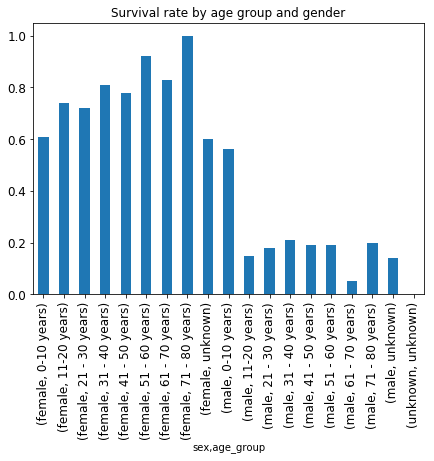

In [11]:
survival_rate(passengers, ['sex', 'age_group'], 'Survival rate by age group and gender')

### 7. Passenger class

,survived
pclass,
1.0,0.62
2.0,0.43
3.0,0.26


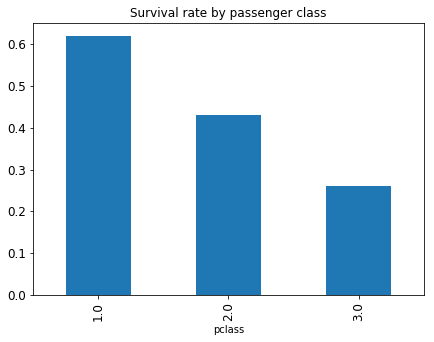

In [12]:
survival_rate(passengers, ['pclass'], 'Survival rate by passenger class')

### 8. Gender and passenger class

survived
sex    pclass          
female 1.0         0.97
       2.0         0.89
       3.0         0.49
male   1.0         0.34
       2.0         0.15
       3.0         0.15

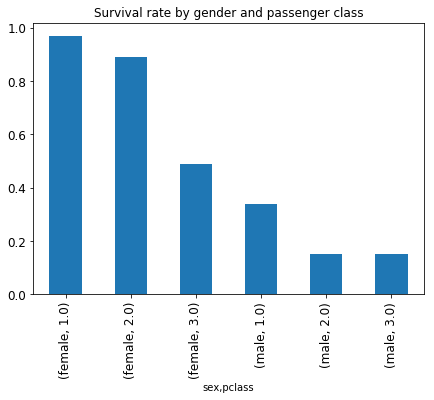

In [13]:
survival_rate(passengers, ['sex', 'pclass'], 'Survival rate by gender and passenger class')

### 9. The cross product of gender and passenger class, with children 15 and under excluded.

survived
sex    pclass          
female 1.0         0.97
       2.0         0.87
       3.0         0.46
male   1.0         0.33
       2.0         0.08
       3.0         0.15

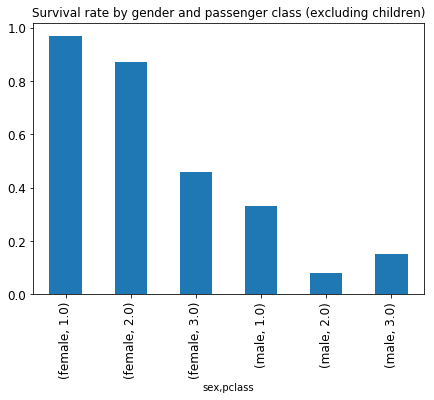

In [14]:
survival_rate(passengers.where(passengers['age'] > 15), ['sex', 'pclass'], 'Survival rate by gender and passenger class (excluding children)')

## Part 3

From above, being female and having a high passenger class improved survival rates. Women in first class had the highest survival rate, followed by women in second class.

As we saw above, the older a woman was, the more likely she was to survive, whereas men of any age above 10 were not very likely to survive. The difference mostly disappears when you separate out by passenger class, suggesting that most older women were first-class passengers.

survived
age_group     pclass          
0-10 years    1.0         0.00
              2.0         1.00
              3.0         0.48
11-20 years   1.0         1.00
              2.0         0.94
              3.0         0.54
21 - 30 years 1.0         0.97
              2.0         0.85
              3.0         0.47
31 - 40 years 1.0         0.97
              2.0         0.95
              3.0         0.43
41 - 50 years 1.0         0.96
              2.0         0.92
              3.0         0.27
51 - 60 years 1.0         1.00
              2.0         0.50
61 - 70 years 1.0         0.80
              3.0         1.00
71 - 80 years 1.0         1.00
unknown       1.0         1.00
              2.0         0.67
              3.0         0.53

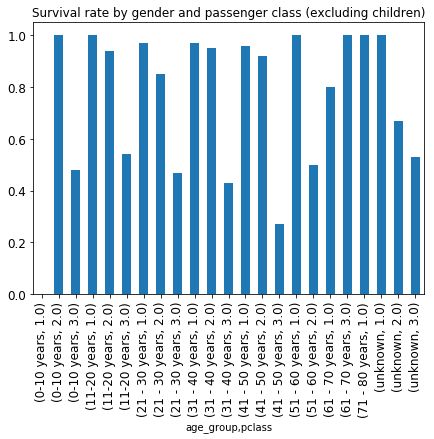

In [15]:
survival_rate(passengers.where(passengers['sex'] == 'female'), ['age_group', 'pclass'], 'Survival rate by gender and passenger class (excluding children)')

Interestingly, once you limit to children only, the discrepancy between male and female survival rates narrows. First- and second-class male children survive at equal or higher rates than their counterpart female children. Third-class children still had higher mortality rates overall. (Unresolved: how many children is this? Were first-class children relatively less prevalent?)

survived
sex    pclass          
female 1.0         0.67
       2.0         1.00
       3.0         0.51
male   1.0         1.00
       2.0         0.92
       3.0         0.31

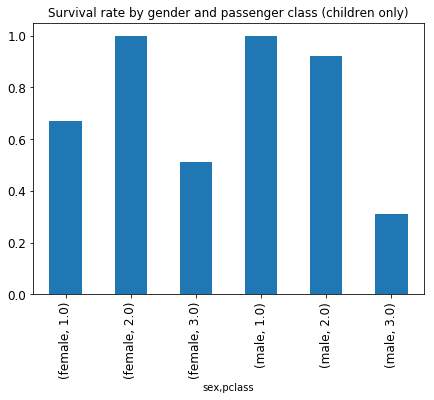

In [16]:
survival_rate(passengers.where(passengers['age'] <= 15), ['sex', 'pclass'], 'Survival rate by gender and passenger class (children only)')

Second class children without a parent on board were less likely to survive than those with parents, but third class children without a parent were far more likely to survive.

survived
pclass parch          
1.0    1.0        1.00
       2.0        0.86
2.0    0.0        0.67
       1.0        1.00
       2.0        1.00
3.0    0.0        0.73
       1.0        0.44
       2.0        0.24

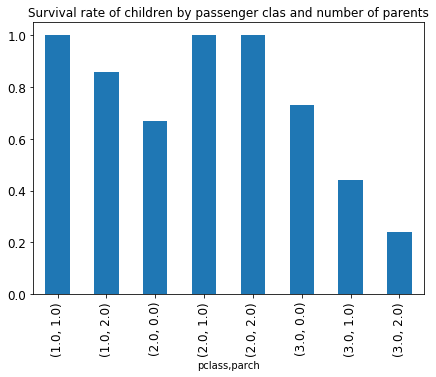

In [17]:
survival_rate(passengers.where(passengers['age'] <= 15), ['pclass', 'parch'], 'Survival rate of children by passenger clas and number of parents')

Second- and third-class adults with children were more likely to survive.

survived
pclass parch          
1.0    0.0        0.60
       1.0        0.70
       2.0        0.73
       3.0        0.50
       4.0        0.50
2.0    0.0        0.31
       1.0        0.60
       2.0        0.71
       3.0        1.00
3.0    0.0        0.21
       1.0        0.42
       2.0        0.38
       3.0        0.50
       4.0        0.00
       5.0        0.17
       6.0        0.00

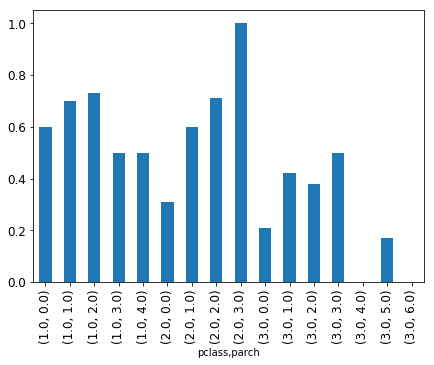

In [18]:
survival_rate(passengers.where(passengers['age'] >= 20), ['pclass', 'parch'], '')

Women who paid more for their tickets had higher survival rates (this aligns with the passenger class differences in survival rates); the trend for men is much less clear (and with lower rates overall).

survived
sex    fare_rounded          
female 0.0               0.61
       50.0              0.84
       100.0             1.00
       150.0             0.94
       200.0             0.86
       250.0             1.00
       500.0             1.00
male   0.0               0.14
       50.0              0.28
       100.0             0.32
       150.0             0.25
       200.0             0.00
       250.0             0.00
       500.0             1.00

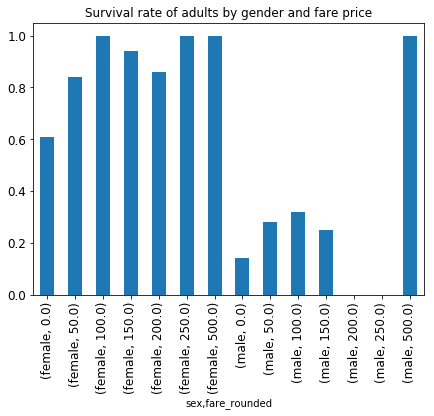

In [19]:
passengers['fare_rounded'] = np.round(passengers.fare/50)*50
survival_rate(passengers.where(passengers['age'] >= 20), ['sex', 'fare_rounded'], 'Survival rate of adults by gender and fare price')

Passengers who embarked at Cherbourg had higher survival rates, and those embarked at Southampton had the worst, even adjusting for passenger class. This suggests that either there is some other skew in the data, or perhaps passenger cabins were arranged such that passengers who embarked at Southampton (the first port of embarkation) had cabins that were more difficult to escape.

survived
pclass embarked          
1.0    C             0.69
       Q             0.67
       S             0.56
2.0    C             0.57
       Q             0.29
       S             0.42
3.0    C             0.37
       Q             0.35
       S             0.21

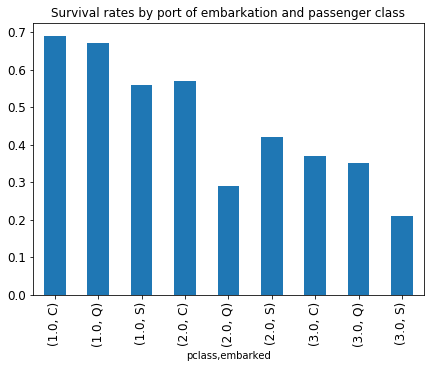

In [20]:
survival_rate(passengers, ['pclass', 'embarked'], 'Survival rates by port of embarkation and passenger class')

## Part 4
Building a survival predictor.


### 10. What kind of learning model should I use?
Are we trying to build a survival predictor for a second Titanic (or a Titanic computer game), or to help us generally understand survival from ship sinkings?

If the latter, we probably want something relatively fast (since we'd likely be doing this on multiple ship-sinking data sets) and easy to understand what the most important factors are. In this case, I would probably use a logistic regression since it's fast and easy to understand the salient features.

If the former, we probably care most about accuracy, although we'd want to avoid overfitting. In this case, I might choose a random forest, which I'd expect to do better on accuracy, and would be better about overfitting than a decision tree.

### 11. Briefly describe the feature engineering we need to do to prepare the data for training.
- Remove or replace null values. In some cases we might want to remove rows (eg if don't know if the person survived or not), in other cases we might want to insert a value, based on the distribution of overall values, or choosing a likely value based on that passenger's other features.
- Remove some features entirely. "Ticket number", "name" and "body number" seem to me that we wouldn't need them -- others we might choose to drop later after seeing they aren't very relevant ("cabin number" could fit in this). 
- Creating new features. For example, we might want to look at the cabin area without the number, or separate the home and destination into separate features.
- Convert string category features to numbers / odds ratios.

### 12. Python package and function for the actual training step?
Package: scikit-learn
Function: `fit` (eg http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)